# Imports

In [1]:
import random
import cv2
import os
import shutil
import matplotlib.pyplot as plt
from scipy import ndimage, misc

from PIL import Image, ImageFilter 
from google.colab.patches import cv2_imshow
from skimage.util import random_noise

## ICE-9 Image Restoration and Reconstruction 

# Use this image : https://en.wikipedia.org/wiki/Lenna#/media/File:Lenna_(test_image).png

### Salt and pepper noise 


(Tutorial)
- Salt-and-pepper noise can only be added in a grayscale image. So, convert an image to grayscale after reading it
- Randomly pick the number of pixels to which noise is added (number_of_pixels)
- Randomly pick some pixels in the image to which noise will be added. It can be done by randomly picking x and y coordinate
- Note the random values generated must be within the range of the image dimensions. The x and y coordinates must be within the range of the image size
Random numbers can be generated using random number generator functions like random.randint used in the code
- Color some randomly picked pixels as black setting their value to 0
- Color some randomly picked pixels as white setting their value to 255
Save the value of the image

In [2]:
if not os.path.exists("ICE 09 Pictures/"):
    ! gdown --folder https://drive.google.com/drive/folders/1fgVWlJR-uVsAtJjpCE50MSouWbYw1lHg?usp=sharing
    shutil.move("ICE 09 Pictures/Lenna.png", "Lenna.png")


 
 Original Image : 
 
 


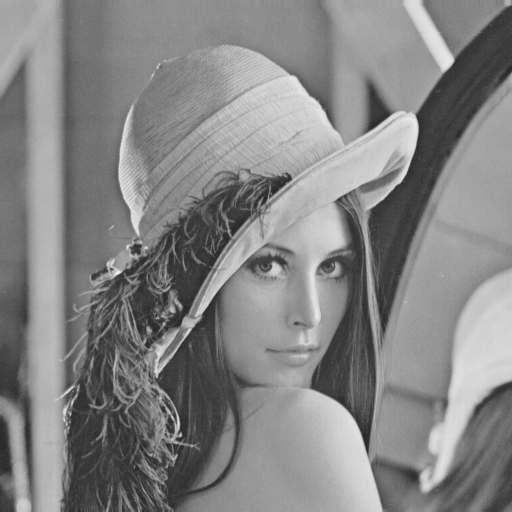


 
 Image with salt and pepper noise : 
 
 


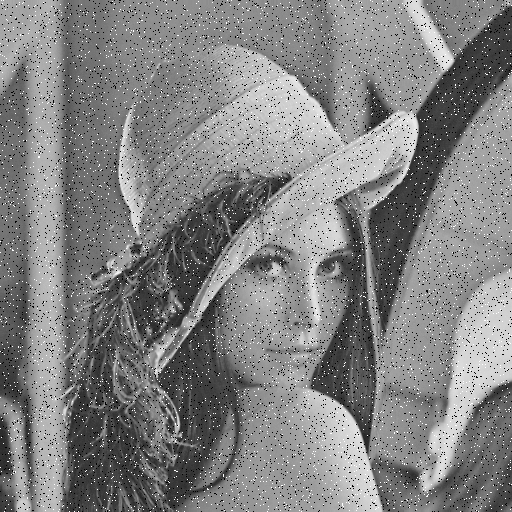

In [3]:
def add_noise(img):
 
    # Getting the dimensions of the image
    row , col = img.shape
     
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        img[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
         
    return img
 
# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('Lenna.png',
                 cv2.IMREAD_GRAYSCALE)

print ("\n \n Original Image : \n \n ")

cv2_imshow(img)

img2 = add_noise(img)

print ("\n \n Image with salt and pepper noise : \n \n ")

cv2_imshow(img2)

# Question 1 
## Explain briefly why is noise found in an image . What are the ways to reduce it ? 


### ANSWER HERE

## Task 1

### Use the salt pepper noise image above and reduce noise in it . 

- Use Median Filter
- Before starting print the noisy image 
- Reduce noise and comment your code appropriately 
- Print the image obtained after you apply filter and reducing noise .



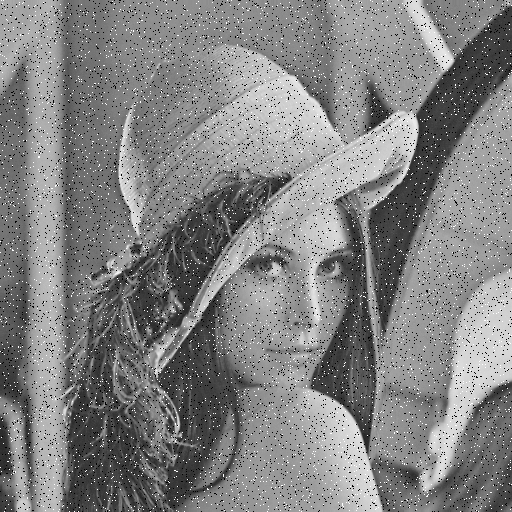

In [4]:
# Show noisy image
cv2_imshow(img2)

In [5]:
# Apply median filter via scipy
img_f = ndimage.median_filter(img2, size=(3, 3))

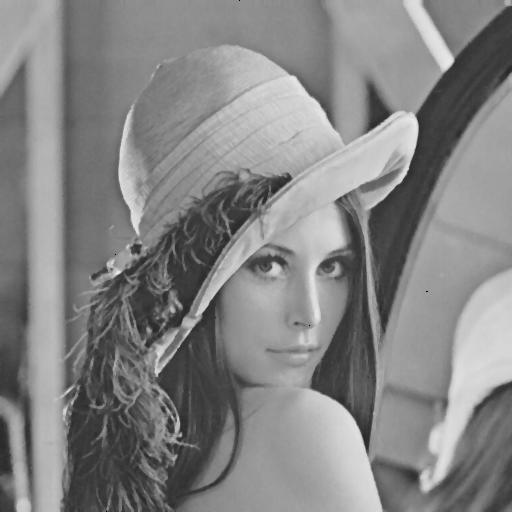

In [6]:
# Display denoised image
cv2_imshow(img_f)

# Question 2   

## In task 1 why is Median filter chosen . What is the use of median filter here ?

The median filter looks at all pixels around the chosen pixel within a window size and selects the pixel with the medain value for the value of the chosen pixel. Doing this ensures that the value of the chosen pixel is relevent to that area of the image, i.e. not skewed towards a value. For example, if using a mean or midpoint filter the black or white pixel(s) around the chose pixel will highly skew some of the chosen pixels towards that value, creating dark or light spots on an image. A min or max filter would be even worse, propogating the black or white pixels (respectivly) across the entire image. A Gaussian filter would work better, but would reduce image sharpness more than a small-window medain filter. 

## Task 2. 

### Use the image  given above (lenna png) and add Poisson Noise in it 

**Hint : Use OpenCV-Python**


https://stackoverflow.com/questions/19289470/adding-poisson-noise-to-an-image

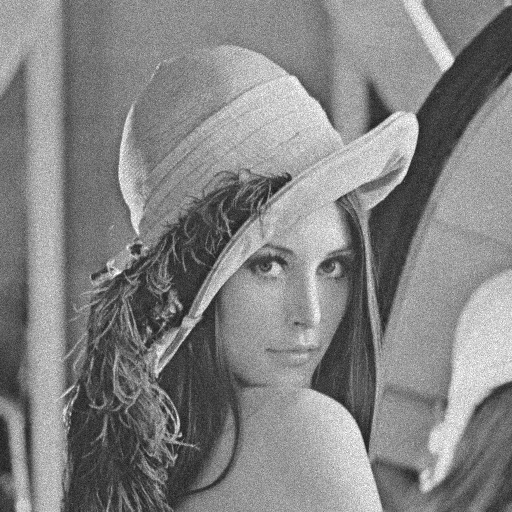

In [7]:
img = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE) # Load image
img_n = random_noise(img, mode="poisson")           # Add poisson noise
img_n = img_n * 255                                 # Convert % values to 255 values
cv2_imshow(img_n)                                   # View